## Social Networks Analysis in Python

### Why Study Networks?

* Centrality in networks can be used to model the impact of a node 
in the network. For instance, how widespread a shock event will be depending on the node from whence it started, such as if the
node is at the centre of the network vs if it were towards the edges.

A shock event could be a conflict, lockdown, etc. E.g. if there is an outbreak, which airports, train/bus stations should be locked down to curtail spread?



In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

#### Nodes and Edges


Edges are the connections between nodes or vertices. In production networks, the edges can represent relationships between firms. The weight of the edges can represent transation values.


### Directed vs undirected networks (asymmetric and symmetric networks)

In directed networks, the order matters e.g. graph of eployees in a company and the number of emails sent. Since email represents sender/receiver relationship that must specify who the sender and receiver are, email networks are *directed*.

In undirected networks, the relationship is symmetrical and order is not important.

To create **undirected networks**:

`G = nx.Graph()`

Add edges -- this automatically creates the nodes in nx

`G.add_edge('A', 'B')`
`G.add_edge('C', 'D')`

Create **directed networks**:
`G = nx.DiGraph()`
`G.add_edge('A', 'B')` - goes from A to B
`G.add_edge('C', 'D')`


### Weighted vs unweighted networks
Not all networks are of equal importantance. In **weighted** networks,
the edges are assigned a numerical weight that has some meaning in the 
relationship. To assign, specify an additional weight arg when creating 
the edges.

`G.add_edge('A', 'B', weight = 5)`
`G.add_edge('C', 'D', weight = 45)`

**Edges** can have many other attributes such as *relation* e.g. family, friend, coworker, 


### Multigraphs
Here, two nodes are connected by multiple edges. E.g. one edge represents 
`relation = friend`, another `relation = coworker`, yet another`relation = neighbour`.

To create a multigraph, instantiate the graph class as a multigraph:

`G = nx.MultiGraph()`
`G.add_edge('A', 'B', relation = 'coworker')`
`G.add_edge('A', 'B', weight = 13, relation = 'family',)` 
`G.add_edge('A', 'B', relation = 'friend')`

## Examples

In [8]:
# Creating undirected graphs
G = nx.Graph() #creating a graph object
G.add_edge('A', 'B') 
G.add_edge('C', 'D')

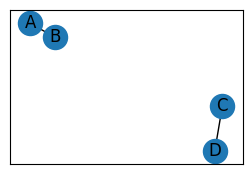

In [10]:
# Visualise the graph

plt.figure(figsize=(3, 2))
nx.draw_networkx(G)

In [12]:
# Directed graphs
G1 = nx.DiGraph() #creating a graph object
G1.add_edge('A', 'B')
G1.add_edge('C', 'D')

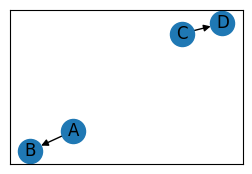

In [13]:
# Visualise the graph

plt.figure(figsize=(3, 2))
nx.draw_networkx(G1)

In [15]:
# Creating multigraphs
G2 = nx.MultiGraph() #creating a graph object
G2.add_edge('A', 'B', relation = 'coworker')
G2.add_edge('A', 'B', relation = 'flatmate')
G2.add_edge('A', 'C', weight = 13, relation = 'family')
G2.add_edge('A', 'D', relation = 'friend')


0

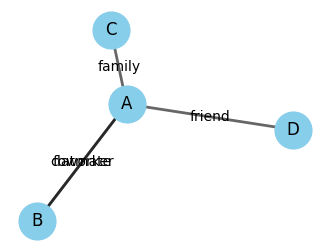

In [17]:
# Plotting the multigraph
plt.figure(figsize=(4, 3))

# Spring layout, might need adjustments
pos = nx.spring_layout(G2)

# Draw nodes with labels
nx.draw_networkx_nodes(G2, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_labels(G2, pos, font_size=12, font_family="sans-serif")

# Draw edges
nx.draw_networkx_edges(G2, pos, width=2, alpha=0.6, edge_color="black")

# Draw edge labels separately for each edge
for u, v, d in G2.edges(data=True):
    for key, attr in d.items():
        if key == 'relation':  # Check if the attribute is 'relation'
            x = (pos[u][0] + pos[v][0]) / 2  # x-coordinate of label
            y = (pos[u][1] + pos[v][1]) / 2  # y-coordinate of label
            plt.text(x, y, attr,  # 'attr' is the label itself
                     horizontalalignment='center', verticalalignment='center')

plt.axis("off")
plt.show()

In [25]:
# Creating undirected graphs with edge weights
G3 = nx.Graph()

G3.add_edge('A', 'B', weight = 21)
G3.add_edge('C', 'D', weight = 23)

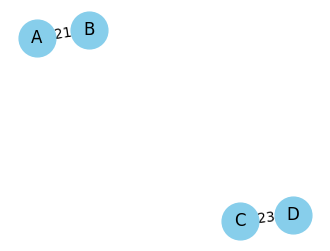

In [28]:
# Visualise the graph

# Plotting the graph
plt.figure(figsize=(4, 3))

# Spring layout, might need adjustments
pos = nx.spring_layout(G3)

# Draw nodes
nx.draw_networkx_nodes(G3, pos, node_size=700, node_color="skyblue")

# Draw edges with weights
nx.draw_networkx_edges(G3, pos, width=2, alpha=0.6, edge_color="black")
labels = nx.get_edge_attributes(G3, 'weight')
nx.draw_networkx_edge_labels(G3, pos, edge_labels=labels)

# Draw labels for nodes
nx.draw_networkx_labels(G3, pos, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()

### Accessing Edges and Attributes of the network - undirected case

In [29]:
# Create a graph object
G = nx.Graph()

# Add edges and attributes
G.add_edge('A', 'B', weight = 5, relation = 'friend')
G.add_edge('C', 'D', weight = 13)

# List all edges of the network
list(G.edges())


[('A', 'B'), ('C', 'D')]

In [104]:
# List all edges of a graph
list(G.edges)

[('A', 'B'), ('C', 'D')]

In [95]:
# List all edges and attributes
list(G.edges(data = True))

[('A', 'B', {'weight': 5, 'relation': 'friend'}), ('C', 'D', {'weight': 13})]

In [43]:

# create a graph object
G4 = nx.Graph()

# Add edges to the graph
G4.add_edge('E', 'F', weight = 13, relation = 'fam')

# List edges where the edges have a particular attribute
list(G4.edges(data = 'relation'))

[('E', 'F', 'fam')]

In [44]:

# create a graph object
G5 = nx.Graph()

# Add edges and attributes
G5.add_edge('A', 'B', weight = 5, relation = 'friend')

# List attributes of given edges of interest
G5.edges['A', 'B']

# NOTE: `G5.edges['A', 'B']` will return an error if I created other nodes of G as follows: `G.add_edge('A', 'B', weight = 5, relation = 'friend')`

{'weight': 5, 'relation': 'friend'}

In [45]:
#Create a graph object
G6 = nx.Graph()

# List attributes of given edges of interest
G6.add_edge('P', 'Q', weight = 5, relation = 'friend')

# Return named attributes 
G6.edges['P', 'Q']['weight']

5

In [99]:
# Remove edges from a graph

G.remove_edge('A', 'B')

In [100]:
G.remove_edge('C', 'D')

### Accessing Edges and Attributes of the network - directed graphs

In [47]:
#Create a graph object
G7 = nx.DiGraph()

# Add edges
G7.add_edge('P', 'Q', weight = 5, relation = 'friend')

# Return named attributes 
G7.edges['P', 'Q']['weight']

# If order of the edges were reversed, an error ensues e.g.
# G7.edges['Q', 'P']['weight'] #results in a KeyError 'P'

5

### Accessing Edges and Attributes of the network - Multigraphs

#### Undirected Case

In [48]:
# Create multigraph object

G8 = nx.MultiGraph()

# Add edges
G8.add_edge('A', 'B', weight = 5, relation = 'friend')
G8.add_edge('A', 'B', weight = 12, relation = 'family')
G8.add_edge('C', 'B', weight = 7, relation = 'colleague')

0

In [110]:
# Access edge attributes
dict(M['A']['B']) #returns a dictionary of attributes per (A,B) edge

{0: {'weight': 5, 'relation': 'friend'},
 1: {'weight': 12, 'relation': 'family'}}

In [49]:
# Return specific attribute for a selected edge e.g. first edge [0]

# M['A']['B'] # returns attributes for all (A,B) edges

G8['A']['B'][0] #returns attributes for the first (A,B) edge


{'weight': 5, 'relation': 'friend'}

#### - Directed Case

In [50]:
# Create a directed multigraph object
G9 = nx.MultiDiGraph()

# Add edges and attributes
G9.add_edge('A', 'B', weight = 5, relation = 'friend')
G9.add_edge('A', 'B', weight = 12, relation = 'family')
G9.add_edge('C', 'B', weight = 6, relation = 'colleague')


0

In [51]:
G9.edges

OutMultiEdgeView([('A', 'B', 0), ('A', 'B', 1), ('C', 'B', 0)])

In [52]:
# Access edges and attributes
G9['A']['B'][0]['weight']

5

In [53]:
# Access edges - inverse direction
# G9['B']['A'][0]['weight'] #KeyError 'A' due to directed case

## Attributes of Nodes

It's possible to add attributes of nodes, instead of just those of edges. Note that so far, nodes have been created implictly through
the creation of edges. To add attributes however, the nodes need to be created explicitly.

In [54]:
# Create a graph object
G0 = nx.Graph()

# Add edges and attributes
G0.add_edge('A', 'B', weight = 5, relation = 'friend')
G0.add_edge('B', 'C', weight = 13, relation = 'family')

# Add node attributes
G0.add_node('A', role = 'scientist')
G0.add_node('B', role = 'teacher')
G0.add_node('C', role = 'banker')



### Accessing node attributes

In [55]:
# List all nodes
G0.nodes

NodeView(('A', 'B', 'C'))

In [56]:
# List nodes and node attributes
G0.nodes(data=True)

NodeDataView({'A': {'role': 'scientist'}, 'B': {'role': 'teacher'}, 'C': {'role': 'banker'}})

In [57]:
# List nodes and node attributes
list(G0.nodes(data=True))

[('A', {'role': 'scientist'}),
 ('B', {'role': 'teacher'}),
 ('C', {'role': 'banker'})]

In [58]:
# Access role of a particular node
G0.nodes['A']['role']

'scientist'

### Bipartite Graphs
These are graphs whose nodes can be split into two sets, L and R, such that every edge connects a node in L with a node in R.


In [5]:
# Building bipartite graphs
#NetworkX doesn't have a specific class for bipartite graphs, but it has a set of algorithms to facilitate their
# study and analysis

from networkx.algorithms import bipartite

# Create a graph class - generic graph class since no specific class for bipartites
B = nx.Graph()
B.add_nodes_from(['A', 'B', 'C', 'D', 'E'], bipartite=0) #use add_nodes_from syntax to create nodes from a list and add bipartite arg
B.add_nodes_from([1, 2, 3, 4], bipartite=1)
B.add_edges_from([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)]) #multiple edges can go from nodes in one set
# to a node in another set

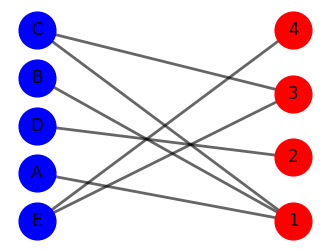

In [30]:

# Visualise the graph
plt.figure(figsize=(4, 3))

# Using bipartite layout
pos = nx.bipartite_layout(B, ['A', 'B', 'C', 'D', 'E'])  

# Draw nodes with different colors for each set
nx.draw_networkx_nodes(B, pos, nodelist=['A', 'B', 'C', 'D', 'E'], node_color='b', node_size=700)
nx.draw_networkx_nodes(B, pos, nodelist=[1, 2, 3, 4], node_color='r', node_size=700)

# Draw edges
nx.draw_networkx_edges(B, pos, width=2, alpha=0.6, edge_color="black")

# Draw labels for nodes
nx.draw_networkx_labels(B, pos, font_size=12, font_family="sans-serif")

plt.axis("off")
plt.show()

In [62]:
B.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 1, 2, 3, 4))

In [63]:
B.edges

EdgeView([('A', 1), ('B', 1), ('C', 1), ('C', 3), ('D', 2), ('E', 3), ('E', 4)])

In [64]:
# Check if a graph is bipartite
bipartite.is_bipartite(B)

True

In [65]:
# Check if a set of nodes is a bipartition of the graph e.g.
X = set([1,2,3,4])

# check if X is a bipartition of B
bipartite.is_bipartite_node_set(B, X)


True

In [67]:
# Check the sets in a bipartite graph
# bipartite.sets(B)

In [68]:
list(nx.connected_components(B))

[{1, 3, 4, 'A', 'B', 'C', 'E'}, {2, 'D'}]

### Properties of Bipartite Graphs



#### Projected (Bipartite) Graphs
Create graphs based on relationships that exist in bipartite graphs. E.g. if set L above (`A - E') represent fans and set R represent teams,
projections can be used to link fans who like the same teams, or link teams supported by the same fans. This could be important for 
marketing: fans supporting the same teams are likely to like same or similar products!

So, we have:
*L-Bipartite graph projection*: network of nodes in L whereby a pair of nodes is connected if they have a common neighbour
in R in the bipartite graph. See the following cells for how to create projections.


In [32]:
# Create projected graphs from bipartite graphs

# Create a graph class
H = nx.Graph()

# add edges from a list of tuples
H.add_edges_from([('A', 1),
                  ('B', 1),
                  ('C', 1),
                  ('D', 1),
                  ('H', 1),
                  ('B', 2),
                  ('C', 2),
                  ('D', 2),
                  ('E', 2),
                  ('G', 2),
                  ('E', 3),
                  ('F', 3),
                  ('H', 3),
                  ('J', 3),
                  ('E', 4),
                  ('I', 4),
                  ('J', 4)
])

# Create set of nodes of the L graph
X = set(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])

# Project the graph 
P = bipartite.projected_graph(H, X)

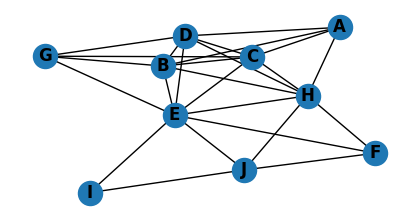

In [71]:
# Plot the graph
plt.figure(figsize=(4, 2))
nx.draw(P, with_labels=True, font_weight='bold') #uses the default spring_layout
plt.show()

In [33]:
# Create a network of the teams using a projection of the teams set
X = set([1,2,3,4])
P = P = bipartite.projected_graph(H, X)

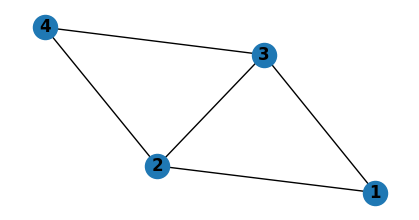

In [8]:
# Plot the graph
plt.figure(figsize=(4, 2))
nx.draw(P, with_labels=True, font_weight='bold')
plt.show()

#### L-Bipartite Weighted Graph Projection
This is used to represent an L-Bipartite Graph Projection with weights on the edges that are proportional to the common neighbours
between the nodes. E.g. to represent how many fans a team has in common.

In [34]:
# L-Bipartite Weighted Graph Projection

# create the projection set
X = set([1,2,3,4])
P = bipartite.weighted_projected_graph(H, X)


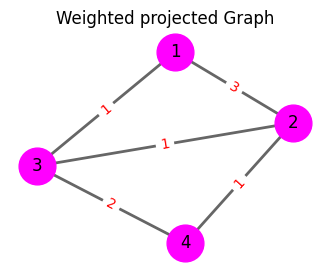

In [35]:
# Visualise the weighted projected graph P
plt.figure(figsize=(4, 3))

# Using spring layout
pos_P = nx.spring_layout(P)

# Draw the nodes
nx.draw_networkx_nodes(P, pos_P, node_size=700, node_color="magenta")

# Draw edges with weights
nx.draw_networkx_edges(P, pos_P, width=2, alpha=0.6, edge_color="black")

# Draw edge labels with weights
edge_labels = {(u, v): d['weight'] for u, v, d in P.edges(data=True)}
nx.draw_networkx_edge_labels(P, pos_P, edge_labels=edge_labels, font_color='red')

# Draw  node labels
nx.draw_networkx_labels(P, pos_P, font_size=12, font_family="sans-serif")

plt.title('Weighted projected Graph')
plt.axis("off")
plt.show()

In [1]:
# # Creating and evaluating multigraphs example
 
# G=nx.MultiGraph()
# G.add_node('A',role='manager')
# G.add_edge('A','B',relation = 'friend')
# G.add_edge('A','C', relation = 'business partner')
# G.add_edge('A','B', relation = 'classmate')
# G.nodes['A']['role'] = 'team member'
# G.nodes['B']['role'] = 'engineer'

In [2]:
# G['A']['B'][0]['relation']